#**Importing Libraries**


In [1]:
import tensorflow as tf
import keras
import numpy
import matplotlib
import pandas as pd
import cv2
import sklearn
import torch
import scipy
import sklearn
import numpy as np
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split

#**Importing Dataset**

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/merged_dataset_processed.csv")
dataset

,File,Filename,First_commit,Last_commit,Total_commits,TIME_COST_IN_DAYS,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause,Number_of_Authors,Time_Class
0,https://github.com/Anish-Agnihotri/dhof-loot/b...,images.js,"Aug 27, 2021","Aug 28, 2021",1,1,31,228,1,4,0,1,1,0,0,1,1
1,https://github.com/Anish-Agnihotri/dhof-loot/b...,index.js,"Aug 27, 2021","Aug 28, 2021",2,1,36,230,1,2,0,0,1,0,0,1,1
2,https://github.com/Anish-Agnihotri/dhof-loot/b...,parse.js,"Aug 27, 2021","Sep 3, 2021",8,7,53,467,6,6,1,0,6,0,0,1,1
3,https://github.com/HashLips/generative-art-ope...,index1.js,"Aug 24, 2021","Sep 1, 2021",7,8,183,1280,26,35,1,3,2,2,0,1,1
4,https://github.com/HashLips/generative-art-ope...,config.js,"Aug 24, 2021","Sep 2, 2021",7,9,113,637,10,16,1,5,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://github.com/mozilla/pdf.js/blob/master/...,simpleviewer.js,"Sep 30, 2014","Jul 29, 2021",23,2494,51,270,2,3,1,2,0,0,0,5,6
196,https://github.com/mozilla/pdf.js/blob/master/...,viewer.js,"Jul 27, 2016","Mar 12, 2021",23,1689,344,1930,35,68,18,18,0,2,0,5,5
197,https://github.com/mozilla/pdf.js/blob/master/...,pdf2svg.js,"Aug 14, 2014","Mar 12, 2021",25,2402,104,700,15,20,14,3,1,1,0,5,6
198,https://github.com/mozilla/pdf.js/blob/master/...,getinfo.js,"Apr 19, 2014","Mar 12, 2021",17,2519,55,391,9,11,7,1,1,0,0,5,6


#**Methodology 2(a.2)**

##**Seperating Labels from Dataset**

In [3]:
TCC_lbl = dataset["Time_Class"]

In [4]:
TCC_lbl.value_counts()

1    56
5    39
3    35
6    34
2    30
4     6
Name: Time_Class, dtype: int64

##**Keeping the column Cyclomatic Complexity as Training-Testing Data**

In [5]:
dataset_unlbl = dataset.drop(columns=["File","Filename","First_commit","Last_commit","Time_Class","TIME_COST_IN_DAYS","Number_of_Authors"])

In [6]:
dataset_unlbl

,Total_commits,NLOC,TOTAL TOKENS,TOTAL FUNCTIONS,CYCLOMATIC COMPLEXITY,TOTAL PARAMETERS,Number of IF clause,Number of FOR clause,Number of WHILE clause,Number of SWITCH clause
0,1,31,228,1,4,0,1,1,0,0
1,2,36,230,1,2,0,0,1,0,0
2,8,53,467,6,6,1,0,6,0,0
3,7,183,1280,26,35,1,3,2,2,0
4,7,113,637,10,16,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,23,51,270,2,3,1,2,0,0,0
196,23,344,1930,35,68,18,18,0,2,0
197,25,104,700,15,20,14,3,1,1,0
198,17,55,391,9,11,7,1,1,0,0


##**Splitting the dataset into train and test**

In [7]:
dataset_X_train, dataset_X_test, dataset_y_train, dataset_y_test = train_test_split(dataset_unlbl, TCC_lbl, test_size=0.2, random_state=1)


In [8]:
print(dataset_X_train.shape)
print(dataset_X_test.shape)

(160, 10)
(40, 10)


##**Creating lists to store model data and scores**

In [9]:
Classifier = []
Type = []
hyper = []
Accuracy = []
F1_score = []
Recall = []
Precision = []

#**MACHINE LEARNING**

##**Creating models by tuning hyperparameters**

In [10]:
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score , accuracy_score
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l1','l2']
# Create regularization hyperparameter space
c_values = numpy.logspace(0, 5, 20)
# Create hyperparameter options
hyperparameters_LR = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf_LR = GridSearchCV(estimator=classifier_LR, param_grid=hyperparameters_LR, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.svm import SVC
classifier_SVM = SVC()  
# defining parameter range
hyperparameters_SVM = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
clf_SVM = GridSearchCV(estimator=classifier_SVM, param_grid = hyperparameters_SVM ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)



from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
hyperparameters_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
  
clf_RF = GridSearchCV(estimator=classifier_RF, param_grid = hyperparameters_RF ,n_jobs=-1, cv=cv, scoring='accuracy',error_score=0) 

##**Training and testing before hyperparameter tuning**

In [11]:
SVM = classifier_SVM.fit(dataset_X_train, dataset_y_train)

y_pred_SVM = SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM))


Classifier.append("SVM")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM,average='macro'))
#ROC_AUC.append(roc_curve(dataset_y_test,y_pred_SVM,multi_class='ovr'))

Test - ACC :  0.35
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.92      0.49        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         8
           6       0.60      0.43      0.50         7

    accuracy                           0.35        40
   macro avg       0.16      0.22      0.16        40
weighted avg       0.20      0.35      0.23        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
LR = classifier_LR.fit(dataset_X_train, dataset_y_train)

# Predicting the Test set results
y_pred_LR = LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR))


Classifier.append("LR")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR))
F1_score.append(f1_score(dataset_y_test,y_pred_LR,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         2
           5       0.33      0.50      0.40         8
           6       0.29      0.86      0.43         7

    accuracy                           0.25        40
   macro avg       0.10      0.23      0.14        40
weighted avg       0.12      0.25      0.15        40



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

In [13]:
RF = classifier_RF.fit(dataset_X_train, dataset_y_train)


# Predicting the Test set results
y_pred_RF = RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF))



Classifier.append("RF")
Type.append("ML")
hyper.append("No")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF))
F1_score.append(f1_score(dataset_y_test,y_pred_RF,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

Test - ACC :  0.4
Test  : 
              precision    recall  f1-score   support

           1       0.42      0.42      0.42        12
           2       0.00      0.00      0.00         7
           3       0.22      0.50      0.31         4
           4       0.00      0.00      0.00         2
           5       0.43      0.38      0.40         8
           6       0.55      0.86      0.67         7

    accuracy                           0.40        40
   macro avg       0.27      0.36      0.30        40
weighted avg       0.33      0.40      0.35        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**Training and testing after hyperparameter tuning**

In [14]:
best_SVM = clf_SVM.fit(dataset_X_train, dataset_y_train)

print(best_SVM.best_params_)
print("-------------------------------")

y_pred_SVM_best = best_SVM.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_SVM_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_SVM_best))


Classifier.append("SVM")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_SVM_best))
F1_score.append(f1_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_SVM_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_SVM_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_SVM,multi_class="ovr"))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
-------------------------------
Test - ACC :  0.25
Test  : 
              precision    recall  f1-score   support

           1       0.23      0.25      0.24        12
           2       0.00      0.00      0.00         7
           3       0.22      0.50      0.31         4
           4       0.00      0.00      0.00         2
           5       0.40      0.50      0.44         8
           6       0.20      0.14      0.17         7

    accuracy                           0.25        40
   macro avg       0.18      0.23      0.19        40
weighted avg       0.21      0.25      0.22        40



In [15]:
best_LR = clf_LR.fit(dataset_X_train, dataset_y_train)

print(best_LR.best_params_)
print("-------------------------------")

# Predicting the Test set results
y_pred_LR_best = best_LR.predict(dataset_X_test)


print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_LR_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_LR_best))


Classifier.append("LR")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_LR_best))
F1_score.append(f1_score(dataset_y_test,y_pred_LR_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_LR_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_LR_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_LR))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
-------------------------------
Test - ACC :  0.425
Test  : 
              precision    recall  f1-score   support

           1       0.39      0.58      0.47        12
           2       1.00      0.14      0.25         7
           3       0.20      0.25      0.22         4
           4       0.00      0.00      0.00         2
           5       0.43      0.38      0.40         8
           6       0.62      0.71      0.67         7

    accuracy                           0.42        40
   macro avg       0.44      0.34      0.33        40
weighted avg       0.51      0.42      0.40        40



In [16]:
best_RF = clf_RF.fit(dataset_X_train, dataset_y_train)

print(best_RF.best_params_)
print("-------------------------------")
# Predicting the Test set results
y_pred_RF_best = best_RF.predict(dataset_X_test)

print("Test - ACC : ", accuracy_score(dataset_y_test,y_pred_RF_best))

print("Test  : ")
print(classification_report(dataset_y_test,y_pred_RF_best))



Classifier.append("RF")
Type.append("ML")
hyper.append("Yes")
Accuracy.append(accuracy_score(dataset_y_test,y_pred_RF_best))
F1_score.append(f1_score(dataset_y_test,y_pred_RF_best,average='macro'))
Recall.append(recall_score(dataset_y_test,y_pred_RF_best,average='macro'))
Precision.append(precision_score(dataset_y_test,y_pred_RF_best,average='macro'))
#ROC_AUC.append(roc_auc_score(dataset_y_test,y_pred_RF))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
-------------------------------
Test - ACC :  0.425
Test  : 
              precision    recall  f1-score   support

           1       0.33      0.42      0.37        12
           2       0.00      0.00      0.00         7
           3       0.22      0.50      0.31         4
           4       0.00      0.00      0.00         2
           5       0.67      0.50      0.57         8
           6       0.60      0.86      0.71         7

    accuracy                           0.42        40
   macro avg       0.30      0.38      0.33        40
weighted avg       0.36      0.42      0.38        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**DEEP LEARNING**

In [17]:
import tensorflow as tf
from tensorflow  import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

##**BEFORE HYPERPARAMETER TUNING**

###**Creating models**

In [18]:
# Create BiLSTM model
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Create LSTM or GRU model
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(32)
# GRU and LSTM
model_gru = create_model(32, GRU)
model_lstm = create_model(32, LSTM)

###**Reshaping and changing data type of data as per model**

In [19]:
dataset_X_train1 = dataset_X_train.values.reshape(160,10,1)
print(dataset_X_train1.dtype)
print(dataset_y_train.dtype)
dataset_X_train1 = dataset_X_train1.astype(float)
dataset_y_train1 = dataset_y_train.astype(float)
print(dataset_X_train1.dtype)
print(dataset_y_train1.dtype)

int64
int64
float64
float64


###**Training the deep learning models**

In [20]:

# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 1000,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks = [early_stop])
    return history



In [21]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/1000
13/13 [==============================] - 14s 136ms/step - loss: 7.5085 - val_loss: 4.7573
Epoch 2/1000
13/13 [==============================] - 0s 15ms/step - loss: 3.1902 - val_loss: 2.9236
Epoch 3/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.8279 - val_loss: 3.3505
Epoch 4/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.5829 - val_loss: 3.3829
Epoch 5/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.4020 - val_loss: 3.1712
Epoch 6/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.2607 - val_loss: 3.3102
Epoch 7/1000
13/13 [==============================] - 0s 16ms/step - loss: 2.1991 - val_loss: 3.2991
Epoch 8/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.1412 - val_loss: 3.3020
Epoch 9/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.1003 - val_loss: 3.2654
Epoch 10/1000
13/13 [==============================] - 0s 15ms/step - loss: 2.0582 - val_

In [22]:
history_lstm = fit_model(model_lstm)

Epoch 1/1000
13/13 [==============================] - 4s 77ms/step - loss: 8.9474 - val_loss: 7.8833
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 4.6651 - val_loss: 3.8778
Epoch 3/1000
13/13 [==============================] - 0s 12ms/step - loss: 3.6615 - val_loss: 3.4973
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.4944 - val_loss: 3.7084
Epoch 5/1000
13/13 [==============================] - 0s 12ms/step - loss: 3.1937 - val_loss: 3.8049
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0203 - val_loss: 3.6341
Epoch 7/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.7753 - val_loss: 3.5005
Epoch 8/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.5629 - val_loss: 3.6148
Epoch 9/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.4825 - val_loss: 3.5405
Epoch 10/1000
13/13 [==============================] - 0s 11ms/step - loss: 2.6207 - val_lo

In [23]:
history_gru = fit_model(model_gru)

Epoch 1/1000
13/13 [==============================] - 4s 68ms/step - loss: 8.5047 - val_loss: 8.0272
Epoch 2/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.6795 - val_loss: 3.4983
Epoch 3/1000
13/13 [==============================] - 0s 10ms/step - loss: 3.0492 - val_loss: 3.3864
Epoch 4/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.7020 - val_loss: 3.9320
Epoch 5/1000
13/13 [==============================] - 0s 9ms/step - loss: 2.7957 - val_loss: 3.8722
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.6856 - val_loss: 3.6939
Epoch 7/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.6176 - val_loss: 3.9153
Epoch 8/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.5417 - val_loss: 3.8850
Epoch 9/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.3875 - val_loss: 3.7160
Epoch 10/1000
13/13 [==============================] - 0s 10ms/step - loss: 2.5276 - val_los

###**Plotting graph for train and validation loss**

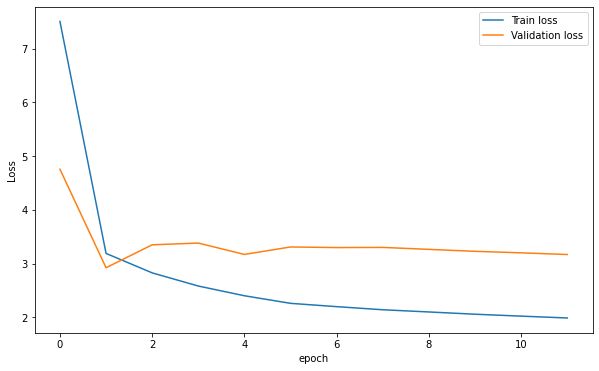

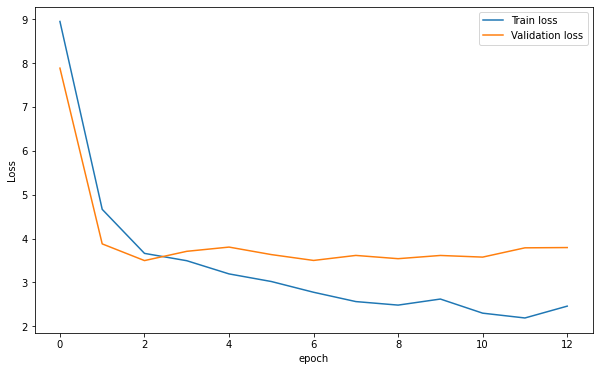

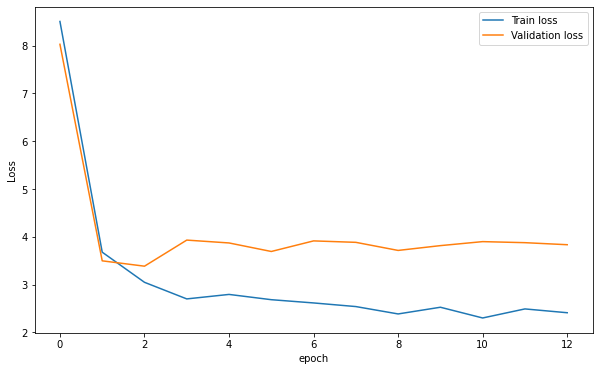

In [24]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm)
plot_loss (history_lstm)
plot_loss (history_gru)

###**Testing the deep learning models**

In [25]:
dataset_X_test1 = dataset_X_test.values.reshape(40,10,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm = prediction_func(model_bilstm)
prediction_lstm = prediction_func(model_lstm)
prediction_gru = prediction_func(model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm.round(), dataset_y_test))
print(classification_report(prediction_bilstm.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_bilstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm.round(), dataset_y_test))
print(classification_report(prediction_lstm.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_lstm.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru.round(), dataset_y_test))
print(classification_report(prediction_gru.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("No")
Accuracy.append(accuracy_score(prediction_gru.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru.round(), dataset_y_test,average='macro'))


Accuracy :  0.2
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.27      0.36        15
         3.0       0.25      0.08      0.12        12
         4.0       0.00      0.00      0.00         5
         5.0       0.12      0.17      0.14         6
         6.0       0.29      1.00      0.44         2

    accuracy                           0.20        40
   macro avg       0.21      0.25      0.18        40
weighted avg       0.32      0.20      0.22        40

Accuracy :  0.125
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.22      0.32        18
         3.0       0.25      0.10      0.14        10
         4.0       0.00      0.00      0.00         5
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         0

    accuracy                           0.12

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**AFTER HYPERPARAMETER TUNING**

###**Creating models**

In [26]:
# Create BiLSTM model
def create_best_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,input_shape=(10,None,12), return_sequences=True)))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model
# Create LSTM or GRU model
def create_best_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape =(12,1)))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam',  metrics=['mse'])
    return model

# BiLSTM
best_model_bilstm = create_best_model_bilstm(32)
# GRU and LSTM
best_model_gru = create_best_model(32, GRU)
best_model_lstm = create_best_model(32, LSTM)

##**Hyperparameter Tuning - 1 : Best Epoch Value**

In [27]:
def best_ep_fit_model(model,ep):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = ep,  
                        validation_split = 0.2, batch_size = 10, 
                        shuffle = False, callbacks=[early_stop])
    return history


###**Training models for range of epoch values and measure Mean Square Error(mse) score**

In [28]:
epochs_range= [500,1000,2000,5000,7000]
mse_dict_bilstm1 = {}
mse_dict_lstm1 = {}
mse_dict_gru1 = {}
for i in epochs_range:
  history_bilstm1 = best_ep_fit_model(best_model_bilstm,i)
  mse_dict_bilstm1[i]=history_bilstm1.history['mse']
  history_lstm1 = best_ep_fit_model(best_model_lstm,i)
  mse_dict_lstm1[i]=history_lstm1.history['mse']
  history_gru1 = best_ep_fit_model(best_model_gru,i)
  mse_dict_gru1[i]=history_gru1.history['mse']

Epoch 1/500
13/13 [==============================] - 9s 168ms/step - loss: 8.1765 - mse: 8.1765 - val_loss: 5.1044 - val_mse: 5.1044
Epoch 2/500
13/13 [==============================] - 0s 15ms/step - loss: 3.3397 - mse: 3.3397 - val_loss: 3.0190 - val_mse: 3.0190
Epoch 3/500
13/13 [==============================] - 0s 16ms/step - loss: 2.9747 - mse: 2.9747 - val_loss: 3.3574 - val_mse: 3.3574
Epoch 4/500
13/13 [==============================] - 0s 16ms/step - loss: 2.6932 - mse: 2.6932 - val_loss: 3.4451 - val_mse: 3.4451
Epoch 5/500
13/13 [==============================] - 0s 15ms/step - loss: 2.4932 - mse: 2.4932 - val_loss: 3.1571 - val_mse: 3.1571
Epoch 6/500
13/13 [==============================] - 0s 16ms/step - loss: 2.3081 - mse: 2.3081 - val_loss: 3.2453 - val_mse: 3.2453
Epoch 7/500
13/13 [==============================] - 0s 16ms/step - loss: 2.2098 - mse: 2.2098 - val_loss: 3.2610 - val_mse: 3.2610
Epoch 8/500
13/13 [==============================] - 0s 15ms/step - loss: 2

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [29]:
mse_dict_bilstm1

{500: [8.176538467407227,
  3.339672088623047,
  2.974679470062256,
  2.6931517124176025,
  2.4931654930114746,
  2.308075428009033,
  2.2097954750061035,
  2.136472702026367,
  2.082266330718994,
  2.0380654335021973,
  1.997230052947998,
  1.9619812965393066],
 1000: [1.9291754961013794,
  1.8994077444076538,
  1.8723928928375244,
  1.8481941223144531,
  1.8267778158187866,
  1.8078908920288086,
  1.7912598848342896,
  1.7765992879867554,
  1.7636115550994873,
  1.7519710063934326,
  1.741355538368225,
  1.7313947677612305,
  1.7218804359436035,
  1.7126891613006592,
  1.7037394046783447,
  1.6949340105056763,
  1.6861872673034668,
  1.6773641109466553,
  1.6683580875396729,
  1.6592135429382324,
  1.6498128175735474,
  1.6402621269226074,
  1.6303693056106567,
  1.6204055547714233,
  1.6098661422729492,
  1.599518895149231,
  1.589443325996399,
  1.5771145820617676,
  1.5777039527893066,
  1.5500097274780273,
  1.5454891920089722,
  1.5249531269073486,
  1.5030553340911865,
  1.5072

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [30]:
for i in epochs_range:
  mse_dict_bilstm1[i] = mse_dict_bilstm1[i][-10:]
  mse_dict_lstm1[i] = mse_dict_lstm1[i][-10:]
  mse_dict_gru1[i] = mse_dict_gru1[i][-10:]

###**Bilstm**

In [31]:
mse_epochs_bilstm1 = pd.DataFrame.from_dict(mse_dict_bilstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_bilstm1

,500,1000,2000,5000,7000
mean,2.289488,1.280870,1.021986,0.789568,0.586196
std,0.333809,0.061554,0.046714,0.068584,0.037045
min,1.961981,1.180946,0.953509,0.692198,0.519834
25%,2.049116,1.229104,0.987068,0.733522,0.564274
50%,2.173134,1.293612,1.032446,0.786670,0.604616
75%,2.446893,1.308111,1.040195,0.829675,0.611966
max,2.974679,1.366923,1.083170,0.912611,0.614783


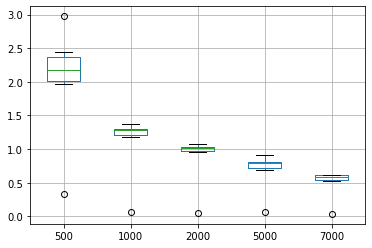

In [32]:
boxplot_11 = mse_epochs_bilstm1.boxplot(column=[500,1000,2000,5000,7000])

###**Lstm**

In [33]:
mse_epochs_lstm1 = pd.DataFrame.from_dict(mse_dict_lstm1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_lstm1

,500,1000,2000,5000,7000
mean,2.668363,2.281378,2.222802,1.620323,1.468238
std,0.369069,0.066318,0.090170,0.063659,0.089200
min,2.325493,2.170171,2.108496,1.546397,1.337322
25%,2.362577,2.264727,2.176457,1.568381,1.398610
50%,2.552197,2.289987,2.205442,1.607020,1.449868
75%,2.924121,2.315391,2.250088,1.677554,1.548713
max,3.346577,2.395911,2.371768,1.712607,1.605513


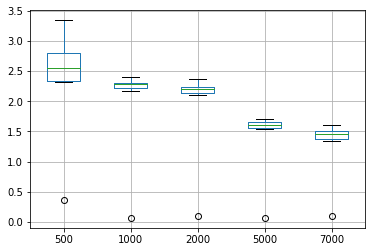

In [34]:
boxplot_12 = mse_epochs_lstm1.boxplot(column=[500,1000,2000,5000,7000])

###**GRU**

In [35]:
mse_epochs_gru1 = pd.DataFrame.from_dict(mse_dict_gru1).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_epochs_gru1

,500,1000,2000,5000,7000
mean,2.690916,1.743810,1.454336,1.360767,1.195141
std,0.255439,0.086597,0.118594,0.077133,0.074681
min,2.408795,1.611557,1.239319,1.233734,1.087827
25%,2.496340,1.708540,1.366316,1.319014,1.139057
50%,2.626041,1.742166,1.492084,1.326156,1.203016
75%,2.808677,1.780231,1.523528,1.418215,1.235407
max,3.174429,1.870391,1.628553,1.485011,1.301378


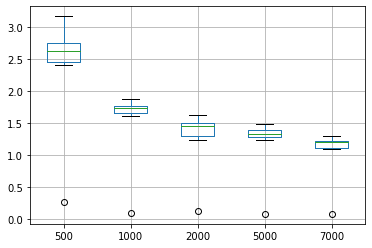

In [36]:
boxplot_13 = mse_epochs_gru1.boxplot(column=[500,1000,2000,5000,7000])

##**Hyperparameter Tuning - 2 : Best Batch Size**

In [37]:
def best_bs_fit_model(model,bs):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = bs, 
                        shuffle = False, callbacks=[early_stop])
    return history

###**Training models for range of batch size values and measure Mean Square Error(mse) score**

In [38]:
batch_range = [4,5,8,10,20]
mse_dict_bilstm2 = {}
mse_dict_lstm2 = {}
mse_dict_gru2 = {}
for i in batch_range:
  history_bilstm2 = best_bs_fit_model(best_model_bilstm,i)
  mse_dict_bilstm2[i]=history_bilstm2.history['mse']
  history_lstm2 = best_bs_fit_model(best_model_lstm,i)
  mse_dict_lstm2[i]=history_lstm2.history['mse']
  history_gru2 = best_bs_fit_model(best_model_gru,i)
  mse_dict_gru2[i]=history_gru2.history['mse']


Epoch 1/7000
32/32 [==============================] - 5s 63ms/step - loss: 0.8332 - mse: 0.8332 - val_loss: 5.2451 - val_mse: 5.2451
Epoch 2/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.6921 - mse: 1.6921 - val_loss: 3.1309 - val_mse: 3.1309
Epoch 3/7000
32/32 [==============================] - 0s 12ms/step - loss: 1.4697 - mse: 1.4697 - val_loss: 3.4172 - val_mse: 3.4172
Epoch 4/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.2467 - mse: 1.2467 - val_loss: 3.4690 - val_mse: 3.4690
Epoch 5/7000
32/32 [==============================] - 0s 13ms/step - loss: 1.1142 - mse: 1.1142 - val_loss: 3.6388 - val_mse: 3.6388
Epoch 6/7000
32/32 [==============================] - 0s 14ms/step - loss: 0.9535 - mse: 0.9535 - val_loss: 3.4787 - val_mse: 3.4787
Epoch 7/7000
32/32 [==============================] - 0s 13ms/step - loss: 0.8460 - mse: 0.8460 - val_loss: 3.5335 - val_mse: 3.5335
Epoch 8/7000
32/32 [==============================] - 0s 13ms/step - 

###**Mean Square Error(mse) score stored in dictionary for all epochs range**

In [39]:
mse_dict_bilstm2

{4: [0.8332470059394836,
  1.6921498775482178,
  1.4696980714797974,
  1.2467145919799805,
  1.114222764968872,
  0.9534805417060852,
  0.845959484577179,
  0.7884072661399841,
  0.7465370893478394,
  0.6941801309585571,
  0.6365196108818054,
  0.5967254638671875],
 5: [0.5552065372467041,
  0.5424566268920898,
  0.5202184319496155,
  0.5000615119934082,
  0.47619232535362244,
  0.47953739762306213,
  0.5024632811546326,
  0.5668134689331055,
  0.492400586605072,
  0.4417935311794281,
  0.4098269045352936,
  0.39383283257484436,
  0.3957928717136383,
  0.37800905108451843,
  0.36321762204170227,
  0.36413300037384033,
  0.35515907406806946,
  0.3556393086910248,
  0.3488956391811371,
  0.3386114239692688],
 8: [0.3216465711593628,
  0.3102809190750122,
  0.30128079652786255,
  0.29583513736724854,
  0.2964570224285126,
  0.29126593470573425,
  0.2879548966884613,
  0.28510817885398865,
  0.2850641906261444,
  0.28191331028938293,
  0.2769783139228821,
  0.275564968585968],
 10: [0.2680

###**Considering last 10 values of the mse scores stored and generating boxplot for the values of mse score for each epochs and for all models**

In [40]:
for i in batch_range:
  mse_dict_bilstm2[i] = mse_dict_bilstm2[i][-10:]
  mse_dict_lstm2[i] = mse_dict_lstm2[i][-10:]
  mse_dict_gru2[i] = mse_dict_gru2[i][-10:]

###**Bilstm**

In [41]:
mse_batch_bilstm2 = pd.DataFrame.from_dict(mse_dict_bilstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_bilstm2

,4,5,8,10,20
mean,0.909245,0.370312,0.287742,0.231838,0.200232
std,0.285841,0.023142,0.008495,0.007077,0.003566
min,0.596725,0.338611,0.275565,0.223647,0.195120
25%,0.707269,0.355279,0.282701,0.225161,0.197633
50%,0.817183,0.363675,0.286532,0.232067,0.200127
75%,1.074037,0.389877,0.294693,0.238146,0.202774
max,1.469698,0.409827,0.301281,0.241229,0.205919


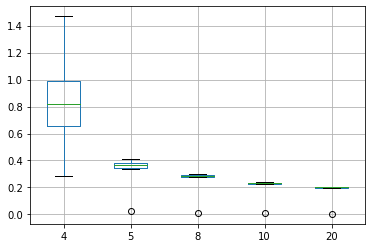

In [42]:
boxplot_21 = mse_batch_bilstm2.boxplot(column=[4,5,8,10,20])

###**Lstm**

In [43]:
mse_batch_lstm2 = pd.DataFrame.from_dict(mse_dict_lstm2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_lstm2

,4,5,8,10,20
mean,1.417397,1.186763,1.044514,0.932425,0.898156
std,0.154667,0.075012,0.060883,0.052518,0.098461
min,1.241835,1.090256,0.960948,0.843996,0.777609
25%,1.310254,1.147977,1.004764,0.897048,0.836176
50%,1.378831,1.173392,1.044281,0.937659,0.886892
75%,1.458860,1.230256,1.083637,0.968265,0.944499
max,1.763593,1.313024,1.152571,1.017822,1.093975


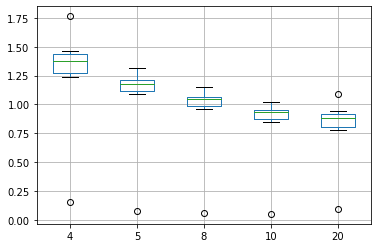

In [44]:
boxplot_22 = mse_batch_lstm2.boxplot(column=[4,5,8,10,20])

###**GRU**

In [45]:
mse_batch_gru2 = pd.DataFrame.from_dict(mse_dict_gru2).describe().loc[['mean','std','min','25%','50%','75%','max']]
mse_batch_gru2

,4,5,8,10,20
mean,1.174507,0.868127,0.698461,0.675106,0.557311
std,0.105513,0.099165,0.060117,0.039850,0.038361
min,1.006891,0.716209,0.579714,0.617592,0.504998
25%,1.105637,0.826963,0.667937,0.640810,0.532438
50%,1.177114,0.840942,0.699303,0.682774,0.554680
75%,1.238149,0.939873,0.730159,0.705805,0.588322
max,1.342065,1.034680,0.779606,0.730060,0.612233


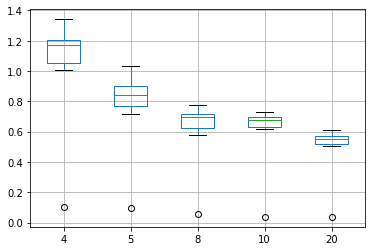

In [46]:
boxplot_23 = mse_batch_gru2.boxplot(column=[4,5,8,10,20])

##**Training the Models**

In [47]:
def best_fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(dataset_X_train1, dataset_y_train1, epochs = 7000,  
                        validation_split = 0.2, batch_size = 20, 
                        shuffle = False, callbacks=[early_stop])
    return history

In [48]:
history_bilstm_best = best_fit_model(best_model_bilstm)

Epoch 1/7000
7/7 [==============================] - 0s 24ms/step - loss: 0.1940 - mse: 0.1940 - val_loss: 3.5283 - val_mse: 3.5283
Epoch 2/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.1929 - mse: 0.1929 - val_loss: 3.5286 - val_mse: 3.5286
Epoch 3/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.1918 - mse: 0.1918 - val_loss: 3.5305 - val_mse: 3.5305
Epoch 4/7000
7/7 [==============================] - 0s 19ms/step - loss: 0.1907 - mse: 0.1907 - val_loss: 3.5320 - val_mse: 3.5320
Epoch 5/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.1897 - mse: 0.1897 - val_loss: 3.5352 - val_mse: 3.5352
Epoch 6/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.1886 - mse: 0.1886 - val_loss: 3.5361 - val_mse: 3.5361
Epoch 7/7000
7/7 [==============================] - 0s 18ms/step - loss: 0.1875 - mse: 0.1875 - val_loss: 3.5375 - val_mse: 3.5375
Epoch 8/7000
7/7 [==============================] - 0s 21ms/step - loss: 0.1864 - m

In [49]:
history_lstm_best = best_fit_model(best_model_lstm)

Epoch 1/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.8446 - mse: 0.8446 - val_loss: 2.6535 - val_mse: 2.6535
Epoch 2/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.8499 - mse: 0.8499 - val_loss: 2.8060 - val_mse: 2.8060
Epoch 3/7000
7/7 [==============================] - 0s 14ms/step - loss: 0.7955 - mse: 0.7955 - val_loss: 2.9174 - val_mse: 2.9174
Epoch 4/7000
7/7 [==============================] - 0s 15ms/step - loss: 0.8743 - mse: 0.8743 - val_loss: 2.7808 - val_mse: 2.7808
Epoch 5/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.8460 - mse: 0.8460 - val_loss: 2.6468 - val_mse: 2.6468
Epoch 6/7000
7/7 [==============================] - 0s 15ms/step - loss: 0.7415 - mse: 0.7415 - val_loss: 2.8797 - val_mse: 2.8797
Epoch 7/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.7633 - mse: 0.7633 - val_loss: 2.7533 - val_mse: 2.7533
Epoch 8/7000
7/7 [==============================] - 0s 15ms/step - loss: 1.0090 - m

In [50]:
history_gru_best = best_fit_model(best_model_gru)

Epoch 1/7000
7/7 [==============================] - 0s 17ms/step - loss: 0.6451 - mse: 0.6451 - val_loss: 3.0793 - val_mse: 3.0793
Epoch 2/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5429 - mse: 0.5429 - val_loss: 3.0862 - val_mse: 3.0862
Epoch 3/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.4969 - mse: 0.4969 - val_loss: 3.2413 - val_mse: 3.2413
Epoch 4/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.6073 - mse: 0.6073 - val_loss: 3.1349 - val_mse: 3.1349
Epoch 5/7000
7/7 [==============================] - 0s 11ms/step - loss: 0.5578 - mse: 0.5578 - val_loss: 3.0345 - val_mse: 3.0345
Epoch 6/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 2.8154 - val_mse: 2.8154
Epoch 7/7000
7/7 [==============================] - 0s 12ms/step - loss: 0.4874 - mse: 0.4874 - val_loss: 3.2696 - val_mse: 3.2696
Epoch 8/7000
7/7 [==============================] - 0s 13ms/step - loss: 0.5773 - m

##**Plotting train loss and validation loss graph**

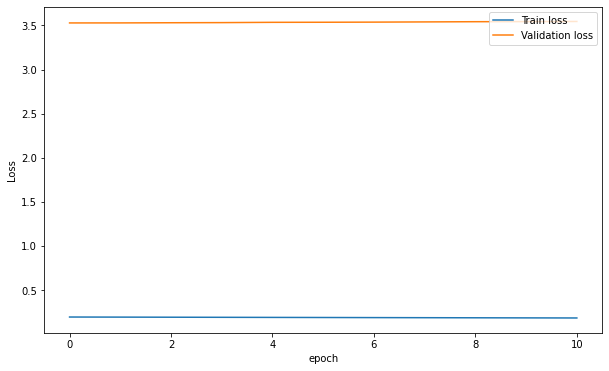

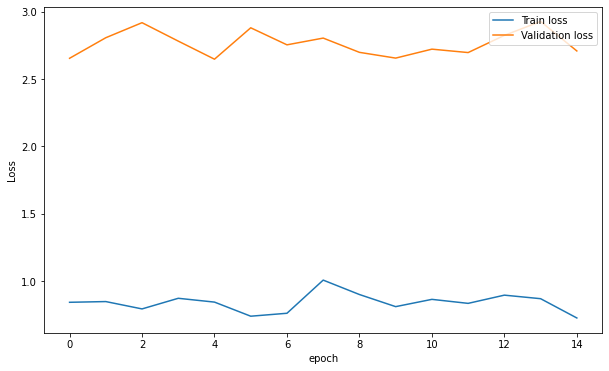

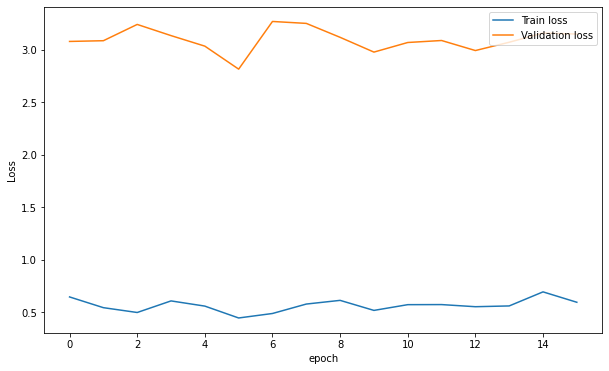

In [51]:
from matplotlib import pyplot as plt
# Plot train loss and validation loss
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    
plot_loss (history_bilstm_best)
plot_loss (history_lstm_best)
plot_loss (history_gru_best)

##**Testing the models**

In [52]:
dataset_X_test1 = dataset_X_test.values.reshape(40,10,1)
dataset_X_test1 = dataset_X_test1.astype(float)


# Make prediction
def best_prediction_func(model):
    prediction = model.predict(dataset_X_test1)
    return prediction

prediction_bilstm_best = best_prediction_func(best_model_bilstm)
prediction_lstm_best = best_prediction_func(best_model_lstm)
prediction_gru_best = best_prediction_func(best_model_gru)


print("Accuracy : ", accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
print(classification_report(prediction_bilstm_best.round(), dataset_y_test))

Classifier.append("BILSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_bilstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_bilstm_best.round(), dataset_y_test,average='macro'))


print("Accuracy : ", accuracy_score(prediction_lstm_best.round(), dataset_y_test))
print(classification_report(prediction_lstm_best.round(), dataset_y_test))

Classifier.append("LSTM")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_lstm_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_lstm_best.round(), dataset_y_test,average='macro'))

print("Accuracy : ", accuracy_score(prediction_gru_best.round(), dataset_y_test))
print(classification_report(prediction_gru_best.round(), dataset_y_test))

Classifier.append("GRU")
Type.append("DL")
hyper.append("Yes")
Accuracy.append(accuracy_score(prediction_gru_best.round(), dataset_y_test))
F1_score.append(f1_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Recall.append(recall_score(prediction_gru_best.round(), dataset_y_test,average='macro'))
Precision.append(precision_score(prediction_gru_best.round(), dataset_y_test,average='macro'))

Accuracy :  0.275
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.33      0.36      0.35        11
         2.0       0.29      0.22      0.25         9
         3.0       0.25      0.12      0.17         8
         4.0       0.50      1.00      0.67         1
         5.0       0.12      0.33      0.18         3
         6.0       0.29      0.40      0.33         5
         7.0       0.00      0.00      0.00         2

    accuracy                           0.28        40
   macro avg       0.22      0.31      0.24        40
weighted avg       0.26      0.28      0.26        40

Accuracy :  0.325
              precision    recall  f1-score   support

         1.0       0.17      0.40      0.24         5
         2.0       0.57      0.25      0.35        16
         3.0       0.00      0.00      0.00         5
         4.0       0.50      0.25      0.33         4
         5.0       0.38      0.60      0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#**Scores Evaluation**

In [53]:
scores = pd.DataFrame (Classifier,columns=['Classifier'])
scores['Type'] = Type
scores['Hyperparameter_Tuning'] = hyper
scores['Accuracy'] = Accuracy
scores['Recall'] = Recall
scores['Precision'] = Precision
scores['F1_score'] = F1_score

In [54]:
scores

,Classifier,Type,Hyperparameter_Tuning,Accuracy,Recall,Precision,F1_score
0,SVM,ML,No,0.350,0.224206,0.155556,0.164815
1,LR,ML,No,0.250,0.226190,0.103175,0.138095
2,RF,ML,No,0.400,0.358135,0.268819,0.298504
3,SVM,ML,Yes,0.250,0.232143,0.175499,0.193134
4,LR,ML,Yes,0.425,0.344246,0.440410,0.334259
5,RF,ML,Yes,0.425,0.378968,0.303704,0.325896
6,BILSTM,DL,No,0.200,0.252778,0.205357,0.179323
7,LSTM,DL,No,0.125,0.053704,0.136905,0.077143
8,GRU,DL,No,0.150,0.082143,0.220238,0.118476
9,BILSTM,DL,Yes,0.275,0.305524,0.222470,0.243289


##**Comparision of Machine Learning models before and after hyperparameter tuning**

In [55]:
ml_scores = scores.loc[scores['Type']=="ML"]

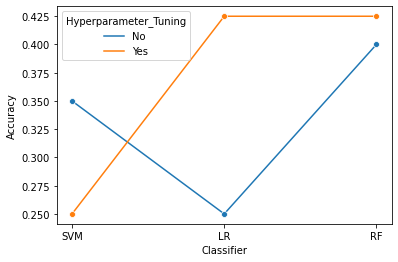

In [56]:
import seaborn as sns
sns.lineplot(x='Classifier',y='Accuracy',data=ml_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Deep Learning models before and after hyperparameter tuning**

In [57]:
dl_scores= scores.loc[scores['Type']=="DL"]

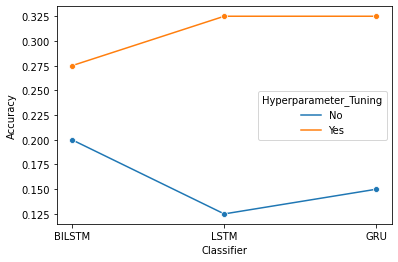

In [58]:
sns.lineplot(x='Classifier',y='Accuracy',data=dl_scores,hue='Hyperparameter_Tuning',marker='o')

##**Comparision of Machine Learning and Deep Learning models after hyperparameter tuning as performance was better only after hyperparameter tuning**

In [59]:
com_scores = scores.loc[scores['Hyperparameter_Tuning']=="Yes"]

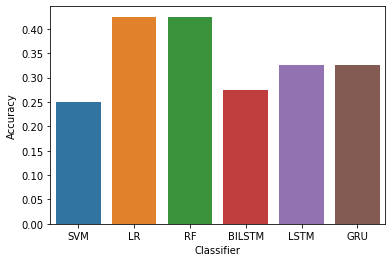

In [60]:
sns.barplot(x='Classifier',y='Accuracy',data=com_scores)

In [61]:
scores.to_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Results/M2(a.2).csv",index=False)